In [1]:
import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
import cv2

In [2]:
class bbox_select():
    %matplotlib notebook 


    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)


        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)

        
            


In [16]:
x=[1, 2, 3, 2, 3, 4 , 0]
y=[2, 3, 4, 5, 6, 7, 6]

In [19]:
im = plt.imread('blue_tit.jpg')
#im = plt.scatter(x, y)

<IPython.core.display.Javascript object>


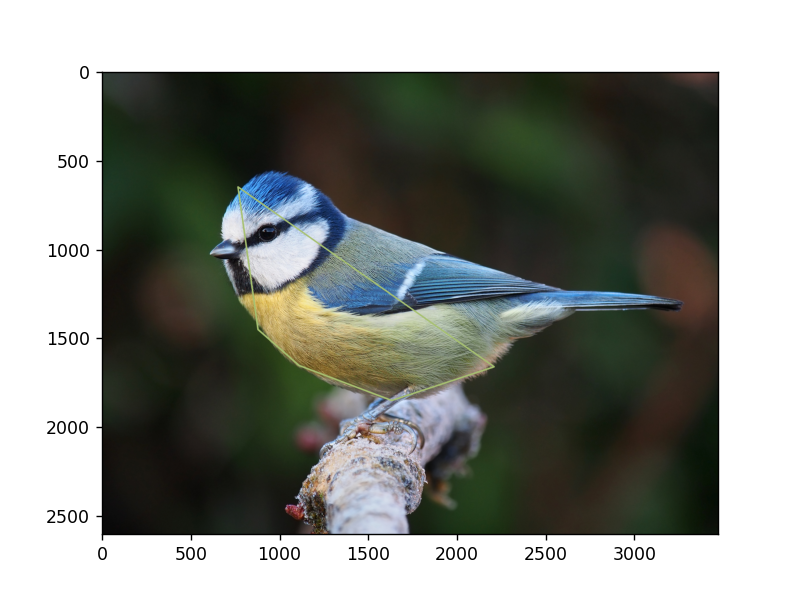

Button(description='Disconnect mpl', style=ButtonStyle())

In [20]:
bs = bbox_select(im)

In [5]:
bs.selected_points


[[731.258479725231, 683.7016615434127],
 [886.258479725231, 578.0198433615942],
 [1020.1221160888673, 556.8834797252307],
 [1238.5312069979582, 669.6107524525032],
 [1428.7584797252312, 824.6107524525032],
 [1759.8948433615947, 930.2925706343217],
 [2055.8039342706857, 1078.2471160888672],
 [2379.8948433615947, 1134.6107524525034],
 [2598.3039342706857, 1219.156206997958],
 [3211.258479725231, 1254.3834797252307],
 [3218.3039342706857, 1331.8834797252307],
 [2626.4857524525037, 1381.2016615434125],
 [2372.84938881614, 1522.1107524525034],
 [2224.8948433615947, 1599.6107524525034],
 [2083.9857524525037, 1726.4289342706852],
 [1752.8493888161402, 1803.9289342706852],
 [1414.6675706343217, 1803.9289342706852],
 [1168.0766615434127, 1719.3834797252307],
 [970.8039342706855, 1557.3380251797762],
 [836.9402979070491, 1374.156206997958],
 [745.34938881614, 1190.9743888161397],
 [653.7584797252308, 1035.9743888161397],
 [604.4402979070491, 993.7016615434125],
 [674.8948433615946, 909.156206997

In [15]:
arr = np.array([bs.selected_points],'int')
mask = cv2.fillPoly(np.zeros(im.shape,np.uint8),arr,[1,1,1])
op = np.multiply(im,mask)
plt.imshow(op)
plt.show()

In [11]:
np.shape(op)

(2604, 3472, 3)

In [14]:
plt.imshow(op[:, :, 1])
plt.show()